Test without beam offset with Au/sapphire at 80K and 300K

{'thickness': 0.015, 'temperature': 80, 'material': <pyFDTR.materials.sapphire object at 0x7f380cb90970>, 'cp': 0.09688563840000002, 'density': 3.97, 'kxx': 6.702924687620913, 'kyy': 6.702924687620913, 'kxy': 0, 'kzz': 6.702924687620913}
{'temperature': 80, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 2000.0}
{'thickness': 6e-06, 'temperature': 80, 'material': <pyFDTR.materials.gold object at 0x7f380f138dc0>, 'cp': 1.97792201038336, 'density': 19.3, 'kxx': 0.6839953648000001, 'kyy': 0.6839953648000001, 'kxy': 0, 'kzz': 0.6839953648000001}
{'thickness': 0.015, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f380c3d4490>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f380c386b30>, 'cp': 2.4

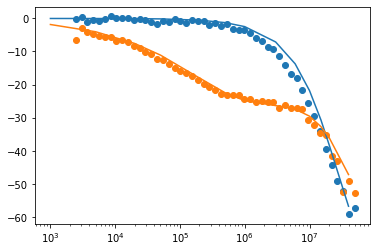

In [6]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt


mpmath.mp.dps = 5

load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

#frequencies = points300k[:,0]
frequencies = [1e3,5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(80)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,2e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
#domain.set_layer_param(1,kt=33.6,kp=33.6)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))

load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_80);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_300);  # Plot some data on the axes.
ax.scatter(points80k[:,0],points80k[:,1])
ax.scatter(points300k[:,0],points300k[:,1])

Test beam offset in Au/Sapphire

{'thickness': 0.015, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f56134d7010>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f55cb9c1210>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.015, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f55e8641540>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f55ca66fac0>, 'cp': 2.494334686, 'density': 

<lambdifygenerated-16>:2: RuntimeWarning: overflow encountered in sinh
  return 0.25*(-(0.0160041510860427*sqrt(1.71637263413629e-5*eps**2 + 1.71637263413629e-5*eta**2 + 1j)*sinh(3.62064102713261*sqrt(1.71637263413629e-5*eps**2 + 1.71637263413629e-5*eta**2 + 1j)) + cosh(3.62064102713261*sqrt(1.71637263413629e-5*eps**2 + 1.71637263413629e-5*eta**2 + 1j)))*cosh(0.000924434577039365*sqrt(4.212599174602e-5*eps**2 + 4.212599174602e-5*eta**2 + 1j)) - 0.786670715440905*sqrt(1.71637263413629e-5*eps**2 + 1.71637263413629e-5*eta**2 + 1j)*sinh(3.62064102713261*sqrt(1.71637263413629e-5*eps**2 + 1.71637263413629e-5*eta**2 + 1j))*sinh(0.000924434577039365*sqrt(4.212599174602e-5*eps**2 + 4.212599174602e-5*eta**2 + 1j))/sqrt(4.212599174602e-5*eps**2 + 4.212599174602e-5*eta**2 + 1j))*exp(0.0005*1j*eps)*exp(-4.100625e-8*eps**2 - 4.100625e-8*eta**2)/(pi**2*(-101.720775744607*(0.0160041510860427*sqrt(1.71637263413629e-5*eps**2 + 1.71637263413629e-5*eta**2 + 1j)*sinh(3.62064102713261*sqrt(1.71637263413629e

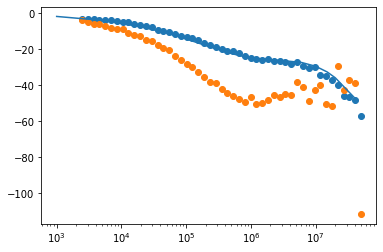

In [1]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 15

load = np.genfromtxt('./subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)

load = np.genfromtxt('./subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)

#frequencies = points00um[:,0]
frequencies = [1e3,5e3,20e3,50e3,100e3,200e3,500e3,750e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_00 = []
for f in frequencies:
  phases_00.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,5e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase(f))


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_00);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.scatter(points00um[:,0],points00um[:,1])
ax.scatter(points05um[:,0],points05um[:,1])

Test 

{'thickness': 0.015, 'temperature': 300, 'material': <pyFDTR.materials.Water object at 0x7f3857e6d1e0>, 'cp': 4.18, 'density': 1.0, 'kxx': 0.00598, 'kyy': 0.00598, 'kxy': 0, 'kzz': 0.00598}
{'temperature': 300, 'materialname_1': 'Water', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f380c71a800>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.015, 'temperature': 300, 'material': <pyFDTR.materials.Air object at 0x7f380f3dd060>, 'cp': 0.000879183, 'density': 0.001225, 'kxx': 0.000259, 'kyy': 0.000259, 'kxy': 0, 'kzz': 0.000259}
{'temperature': 300, 'materialname_1': 'Air', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f380c90b1c0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.015, 

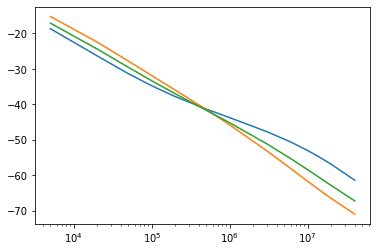

In [ ]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

load = np.genfromtxt('./subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)

load = np.genfromtxt('./subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)

#frequencies = points00um[:,0]
frequencies = [5e3,20e3,50e3,100e3,200e3,500e3,750e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(Water)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
domain.add_toplayer(100e-4,glass)
domain.set_top_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_00 = []
for f in frequencies:
  phases_00.append(model.get_phase_mpmath(f))


domain = Domain(300)
domain.add_substrate(Air)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
domain.add_toplayer(100e-4,glass)
domain.set_top_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase_mpmath(f))

domain = Domain(300)
domain.add_substrate(IPA)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
domain.add_toplayer(100e-4,glass)
domain.set_top_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_20 = []
for f in frequencies:
  phases_20.append(model.get_phase_mpmath(f))

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_00);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_20);  # Plot some data on the axes.
